In [1]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

(1390, 1300, 3)


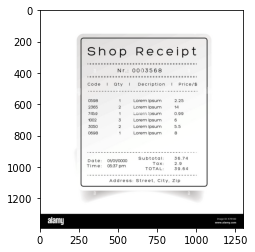

In [2]:
img_path = r'C:\Users\daraa\Downloads\Untitled Folder\test_bill.jpg' # add the r to avoid unicode error
# reading image
img = cv2.imread(img_path)
# print(os.path.exists(r'C:\Users\daraa\Downloads\Untitled Folder\restaurant bill 2.jpg'))
# print(os.getcwd())

print(img.shape)
plt.imshow(img)

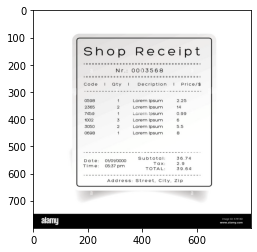

In [3]:
# resizing the image
img = cv2.resize(img, (800,800))

plt.imshow(img)

* # image blurring

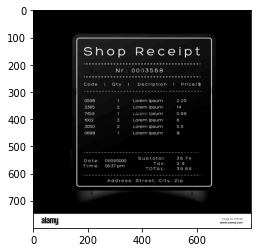

In [4]:
# converting image to greyscale
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap= 'binary')

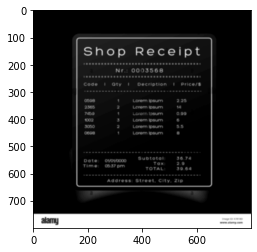

In [5]:
# blurring image

blurred_img = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
plt.imshow(blurred_img, cmap= 'binary')

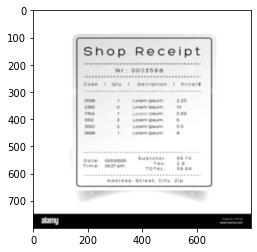

In [6]:
# trying to regenerate the img
regen_img = cv2.cvtColor(blurred_img, cv2.COLOR_GRAY2BGR)
plt.imshow(regen_img)

In [7]:
regen_img.shape

(800, 800, 3)

* # edge detection

In [8]:
# edge dection
edge_img = cv2.Canny(regen_img, 0, 50)
edge_img.shape

(800, 800)

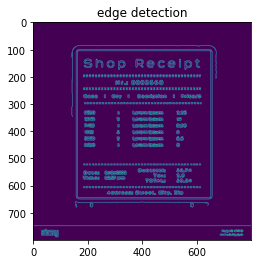

In [9]:
orig_edge_img = edge_img.copy()
plt.title('edge detection')
plt.imshow(orig_edge_img)

* # contour extraction

In [10]:
# contour extraction
contours, _ = cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

1314


In [11]:
# a little sorting
contours = sorted(contours, reverse=True, key= cv2.contourArea)

In [12]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    
    if len(approx)==4:
        target=approx
        break
print(target.shape)
print(target)

(4, 1, 2)
[[[163 102]]

 [[160 644]]

 [[652 647]]

 [[656 106]]]


In [13]:
def reorder_points(pts):
    pts = pts.reshape((4, 2))
    rect = np.zeros((4, 2), dtype=np.float32)
    
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect

In [14]:
# Reorder the points
reordered_points = reorder_points(target)

# Define the output map for perspective transformation
output_map = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])

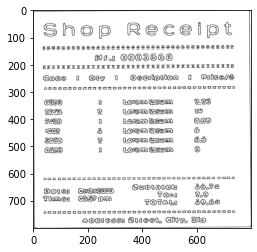

In [15]:
# calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(reordered_points, output_map)

# apply perspective transformation to the original image
result = cv2.warpPerspective(edge_img, M, (800, 800))

# display the result
plt.imshow(result, cmap='binary')
plt.show()

In [16]:
help(cv2.getPerspectiveTransform)

Help on built-in function getPerspectiveTransform:

getPerspectiveTransform(...)
    getPerspectiveTransform(src, dst[, solveMethod]) -> retval
    .   @brief Calculates a perspective transform from four pairs of the corresponding points.
    .   
    .   The function calculates the \f$3 \times 3\f$ matrix of a perspective transform so that:
    .   
    .   \f[\begin{bmatrix} t_i x'_i \\ t_i y'_i \\ t_i \end{bmatrix} = \texttt{map_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}\f]
    .   
    .   where
    .   
    .   \f[dst(i)=(x'_i,y'_i), src(i)=(x_i, y_i), i=0,1,2,3\f]
    .   
    .   @param src Coordinates of quadrangle vertices in the source image.
    .   @param dst Coordinates of the corresponding quadrangle vertices in the destination image.
    .   @param solveMethod method passed to cv::solve (#DecompTypes)
    .   
    .   @sa  findHomography, warpPerspective, perspectiveTransform

